# Kaggle Study 3일차(타이타닉)

[Contents of the Notebook:]

- Part1: Exploratory Data Analysis(EDA):  
1) 특성 분석 (Analysis of the features.)  
2) 관계 찾기(Finding any relations or trends considering multiple features.)  
  
- Part2: Feature Engineering and Data Cleaning:  
1) 특성 추가(Adding any few features.)  
2) 중복 제거(Removing redundant features.)  
3) 모델링 하기 좋은 형태로 변환 (Converting features into suitable form for modeling.)  

- Part3: Predictive Modeling  
1) Running Basic Algorithms.  
2) Cross Validation.  
3) Ensembling.  
4) Important Features Extraction.  

## Part1: Exploratory Data Analysis(EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('C:/Users/이동훈/Desktop/github/kaggle/kagglestudy/Data/titanic/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age,Cabin,Embarked가 null value를 가짐

How many Survived??

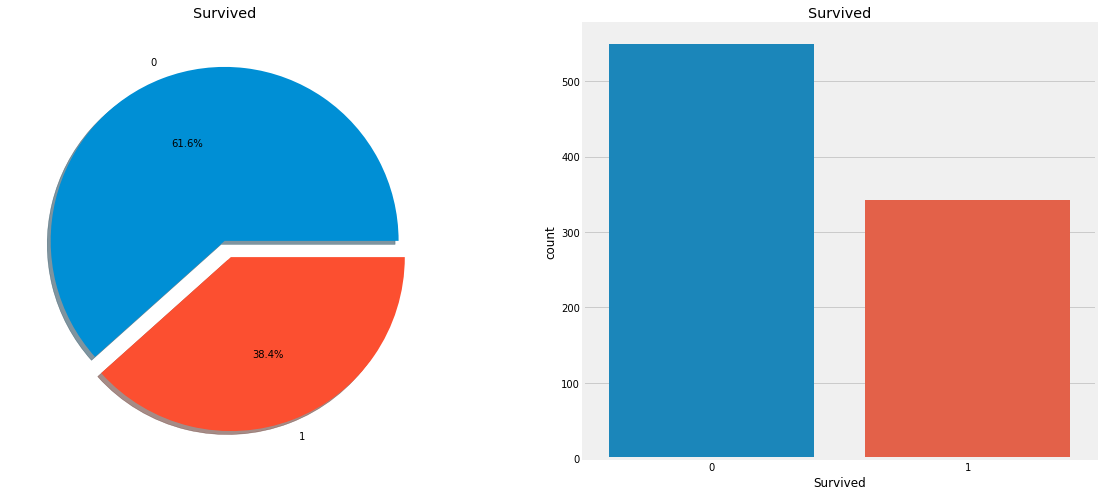

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

-  891명의 승객 중 약 350명만이 살아남았다. 즉, 전체 인원 중 38.4%만이 살아남은 것이다.

#### 변수의 종류 (Types Of Features)

- 범주형 변수:
범주형 변수는 두 개 이상의 범주가 있는 변수이며 해당 형상의 각 값을 범주로 분류할 수 있습니다.예를 들어, 성별은 두 가지 범주(남성 및 여성)를 갖는 범주형 변수입니다. 이제 이러한 변수를 정렬하거나 순서를 지정할 수 없습니다.

데이터 세트의 범주형 특성: 성별, 엠바크드.

- 순서형 변수:
순서형 변수는 범주형 값과 비슷하지만 값 사이에 상대적인 순서 또는 정렬을 가질 수 있다는 점이 다릅니다. 예: 높낮이(높이, 중간, 짧은 값 포함)와 같은 기능이 있으면 높이가 순서형 변수입니다. 여기서는 변수에 상대적인 정렬을 할 수 있습니다.

데이터 세트의 순서 기능: PClass

- 연속 변수:
형상 열의 두 점 사이 또는 최소값 또는 최대값 사이에서 값을 취할 수 있는 경우 형상은 연속형이라고 한다.

데이터 세트의 연속 기능: 나이

#### 특성 분석(Analysing The Features)

##### Sex(범주형변수)분석

In [11]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

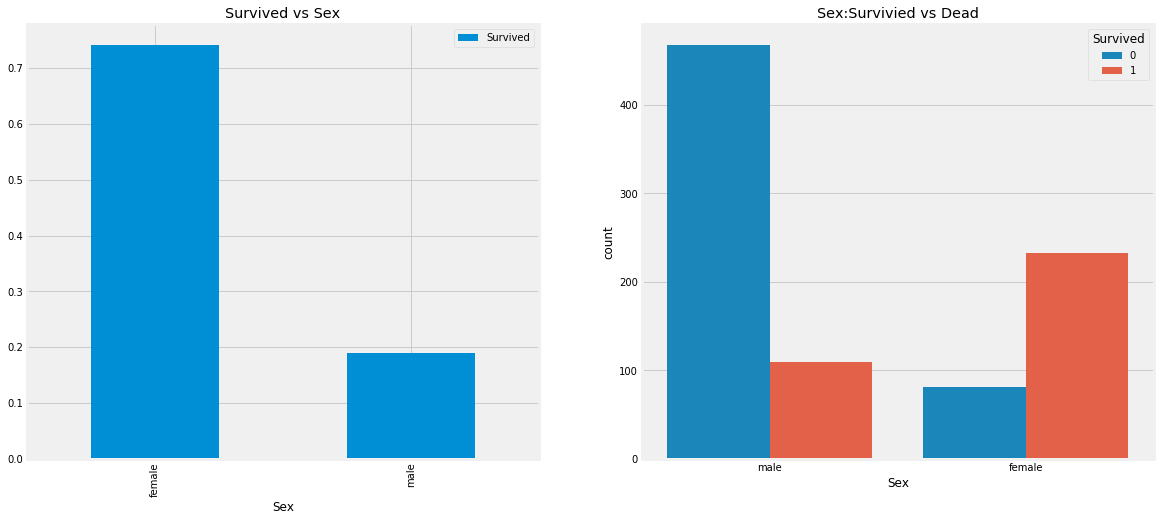

In [13]:
f,ax= plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survivied vs Dead')
plt.show()

- 생존자중 75%가 여자이고, 25%가 남자임(성별은 중요한 요소로 생각됨)

##### Pclass(순서형 변수) 분석

In [14]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


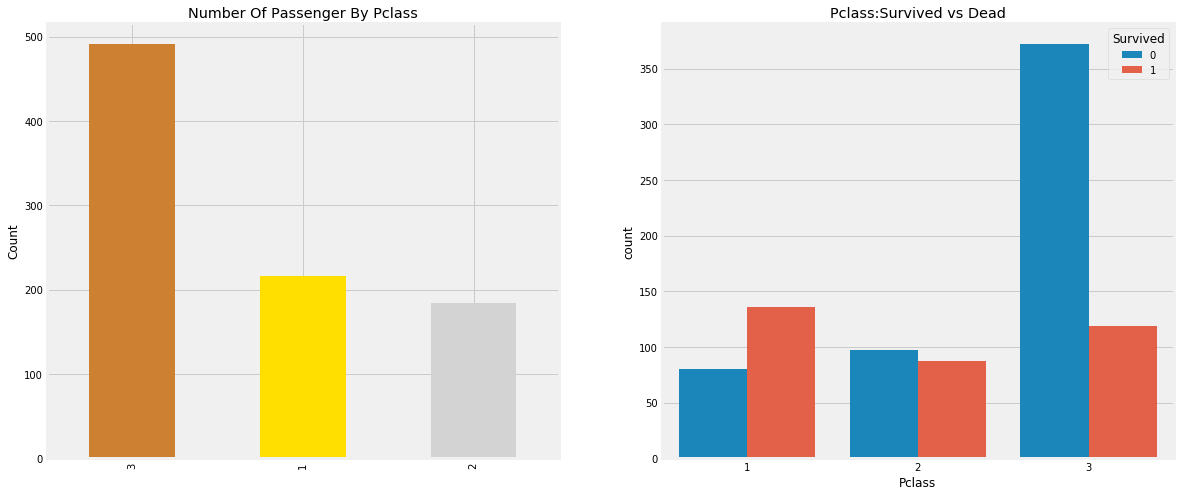

In [16]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passenger By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

- 3 Class 손님이 승객수가 많았지만 생존 확률은 25%였다.
- 반면 1 Class의 경우 63%, 2 Class의 경우 48% 인 것을 보면 상위 Class일 수록 생존확률이 높았다.

In [17]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

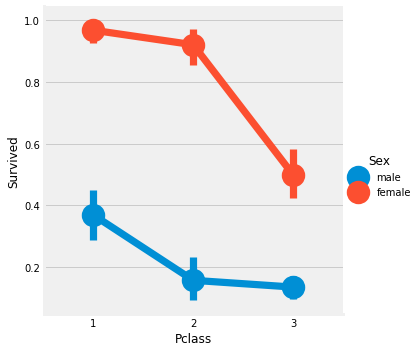

In [18]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

- factorplot은 범주형 변수를 분리해 그릴 때 유용함.
- crosstab과 factorplot을 보면 1 Class의 여성의 생존율이 95%정도 되는 것을 확인 할 수 있다.
- PClass와 상관없이 여성이 우선적으로 구하려는 것이 보인다(1 Class여도 남자의 생존률은 낮은 편이다.)

##### Age(연속형 변수) 분석

In [19]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


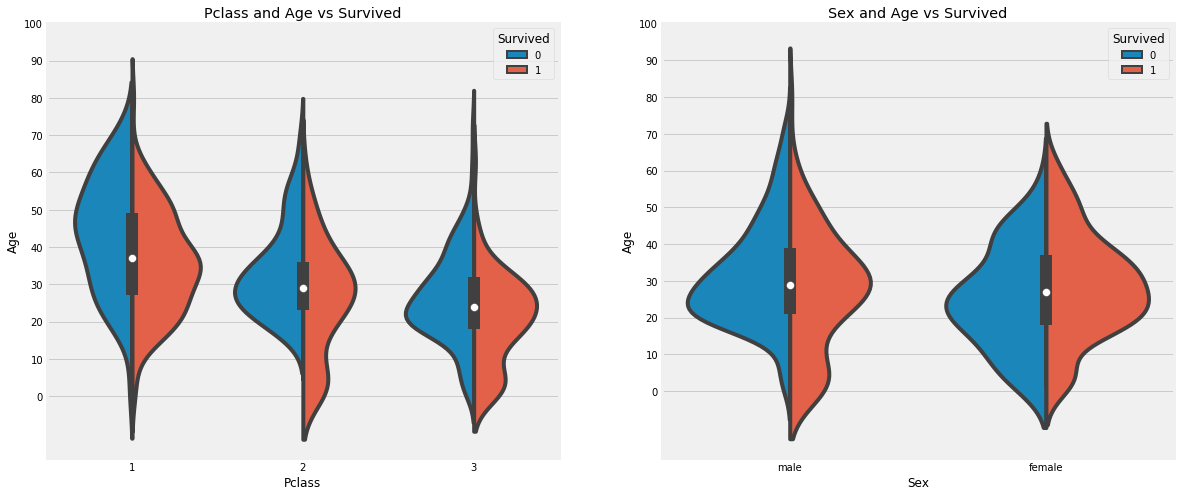

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 어린이 수는 Pclass에 따라 증가, 10세 미만의 생존률은 Pclass와 상관없이 양호
- 1 Class에선 20~50세의 승객이 생존률이 높다. 이 역시 여성이 더 높은 편이다.
- 남성의 경우 연령이 증가할수록 생존률이 낮다.

- 하지만 다양한 연령대가 있어서 모두 다 평균 연령으로 취급하기는 힘듬
- 이를 해결하기 위해 이름에 적힌 Initial을 사용

In [21]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [22]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [23]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [24]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

##### Filling NaN Ages

In [25]:
data.loc[(data.Age.isnull())&(data.Initial == 'Mr'),'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial == 'Mrs'),'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial == 'Master'),'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial == 'Miss'),'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial == 'Other'),'Age'] = 46

In [26]:
data.Age.isnull().any()

False

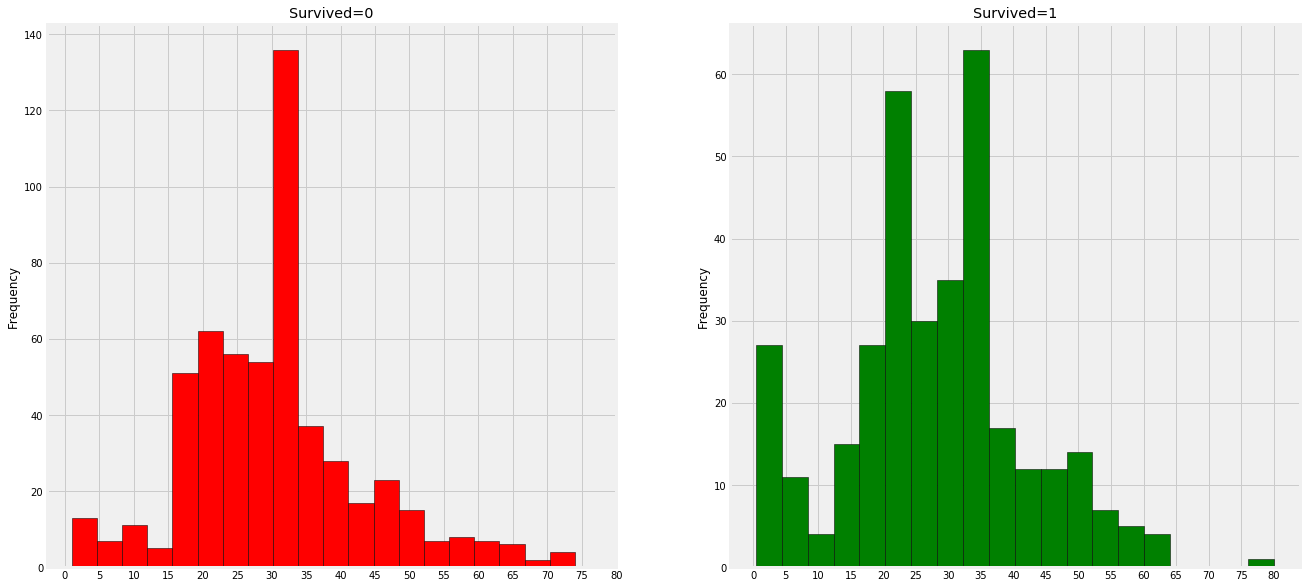

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

- 어린아이(5세)를 대량으로 구했다(여성 및 아동을 우선 구한것으로 보임).

- 가장 나이가 많은 승객은 구조되었다(80살).

- 최대 사망자는 30~40세였다.

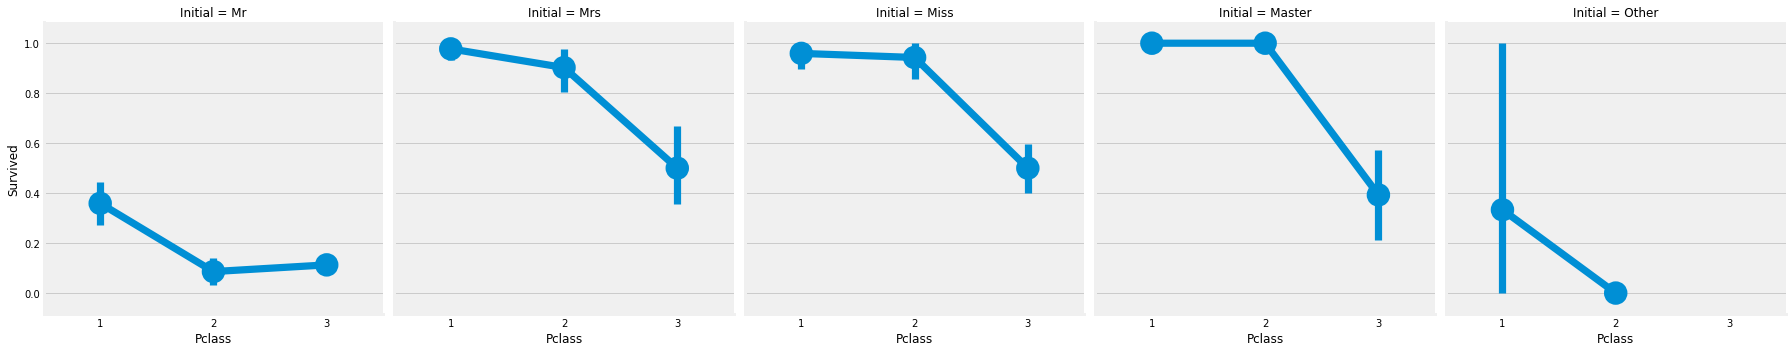

In [28]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

- Pclass와 상관없이 여성과 아이를 먼저 구한 것으로 보인다

##### Embarked(범주형변수) 분석

In [29]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

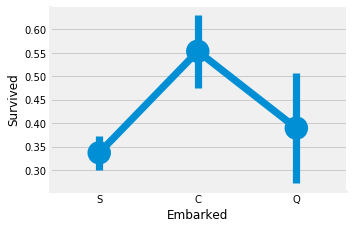

In [30]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- C 항구에서 생존할 가능성이 가장 높고 S가 생존할 확률은 가장 낮다.

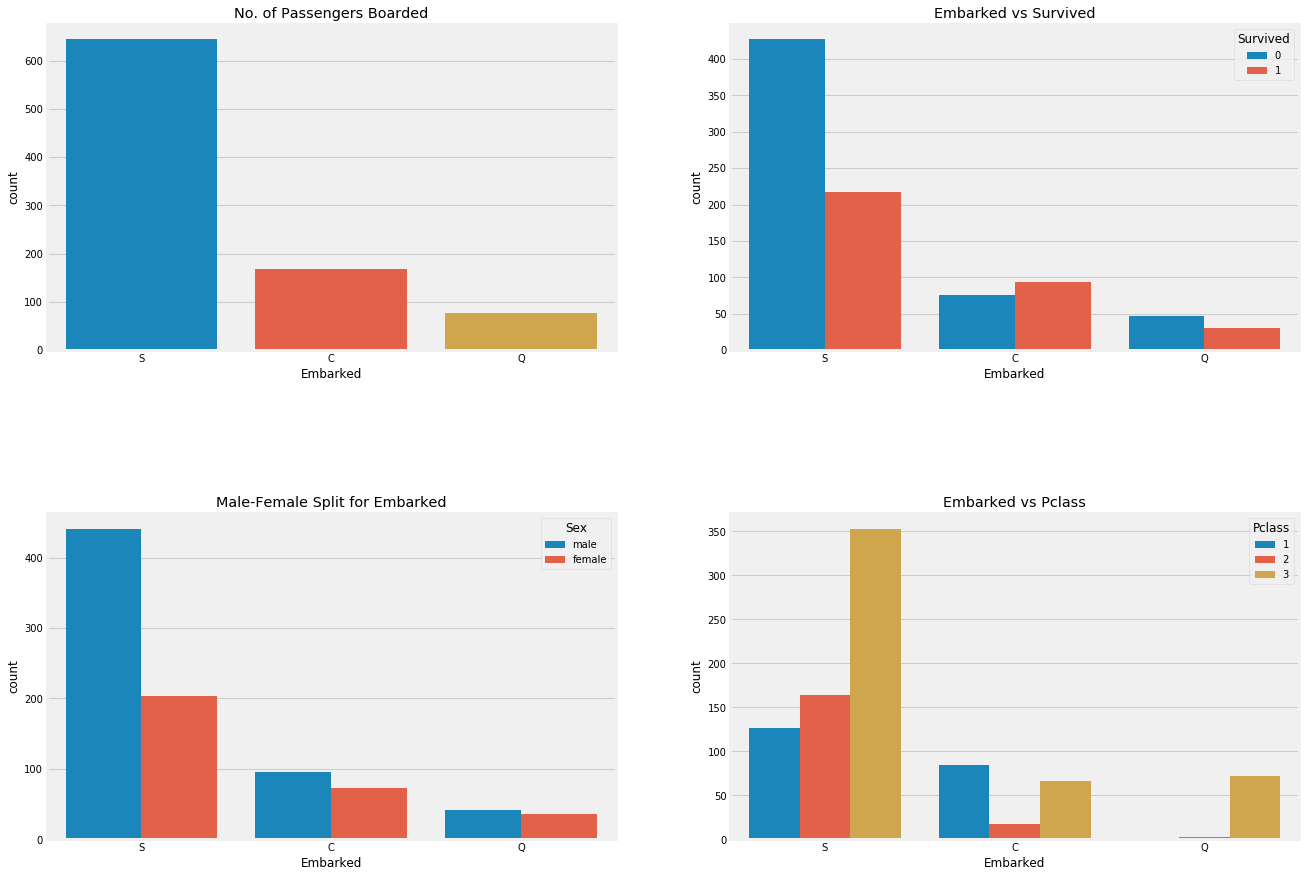

In [33]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[1,0])
ax[1,0].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[0,1])
ax[0,1].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- S에서 탑승한 대부분 은 3 class 출신이다.

- C에서 온 승객들 중 상당수는 살아남은 것으로 보아 그 이유는 아마도 모든 1,2 class 승객을 구조했던 것으로 보인다.

- 대부분의 S 항구에서 탑승한 승객의 생존률은 낮다.

- Q 항구는 승객의 거의 95%가 3 class 이었다.

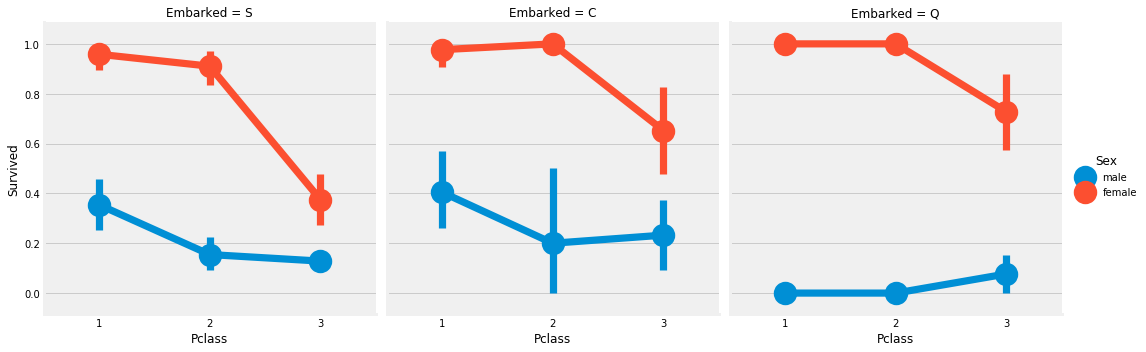

In [34]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

- Pclass와 상관없이 1,2 Class의 여성 생존가능성은 거의 1이다.

- 3 class 승객은 남성과 여성 모두의 생존율이 매우 낮다.

##### Filling Embarked NaN

In [35]:
data['Embarked'].fillna('S',inplace=True)

data.Embarked.isnull().any()

False

##### SibSip(또 다른 특성 )분석

In [36]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


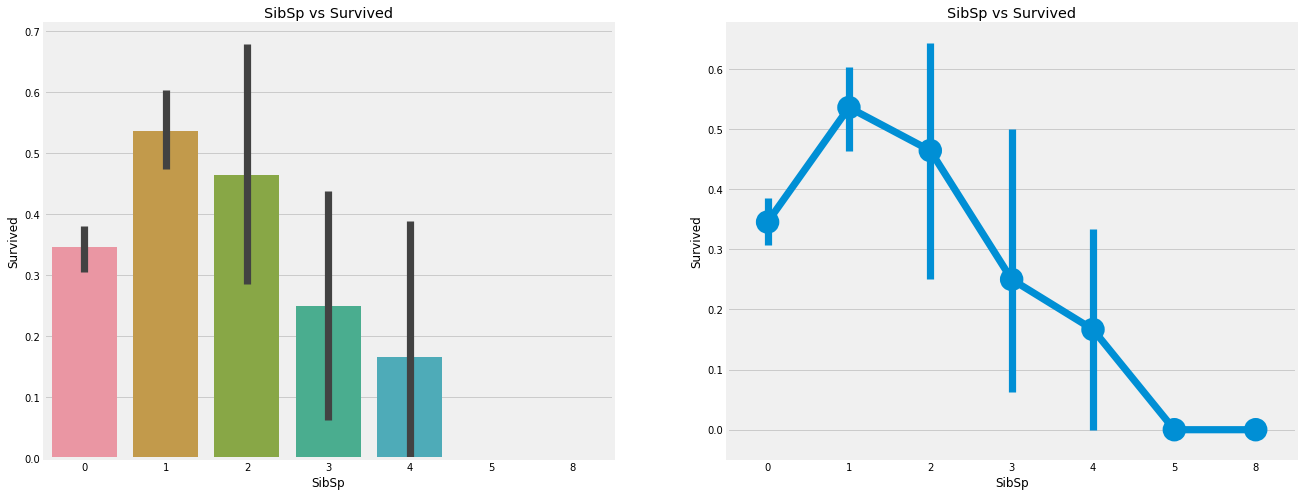

In [81]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2) # 확인
plt.show()

In [58]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 형제 없이 혼자 탑승한 승객의 생존율이 34.5%가 나온다. 형제자매 수가 증가하면 그래프가 대략 감소한다. 
- 즉, 만약 가족이 탑승한다면, 나는 나 자신을 먼저 구하지 않고 가족을 구하려고 노력한다는 의미다.
- 5-8명의 가족이 생존하는 비율은 0%인데, 그 이유는 해당 가족들이 모두 P class가 3class이지 않을가 싶다.

##### Parch

In [59]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


- 대가족이 3 Class에 많이 분포함을 보여줌

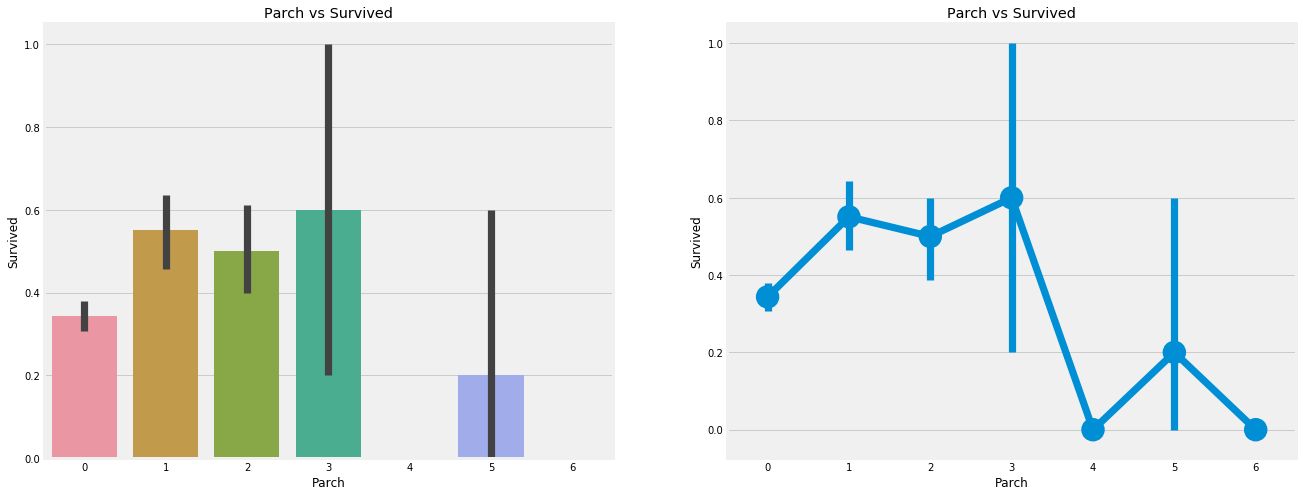

In [79]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

- 부모를 태운 승객은 생존 가능성이 더 크다. 그러나 숫자가 증가할수록 감소한다.

- 1-3명의 부모가 배에 타고 있다면 생존 가능성이 좋다. 혼자 있는 것 또한 치명적인 것으로 판명되고,4명 이상의 부모를 데리고 있을 때 생존의 기회는 줄어든다.

##### Fare(연속형 변수)분석

In [69]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


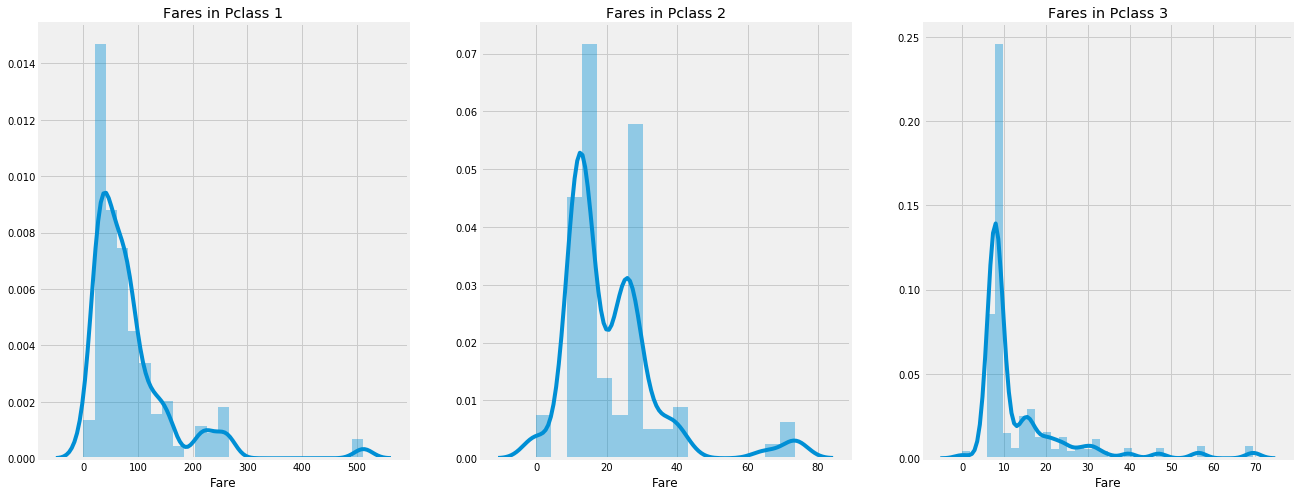

In [70]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

[feature 분석결과]

- Sex: 여성이 생존할 확률은 남성과 비교했을 때 높다.

- Pclass: Pclass가 높은 승객이 더 생존할 확률이 높다.

- Age : 5-10세 미만의 어린이들은 생존 가능성이 높다. 15세에서 35세 사이의 승객들은 많이 죽었다.

- Embarked : C 항구에서 탑승한 승객이 생존 가능성은 더 높아 보인다.

- Parch + SibSp: 1-2명의 형제자매가 있고, 배우자가 있거나, 1-3명의 부모가 있을 때 생존확률이 높다. 반면에 혼자 있거나, 대가족이 함께 여행하면 생존률이 낮다.

#### Correlation Between The Features

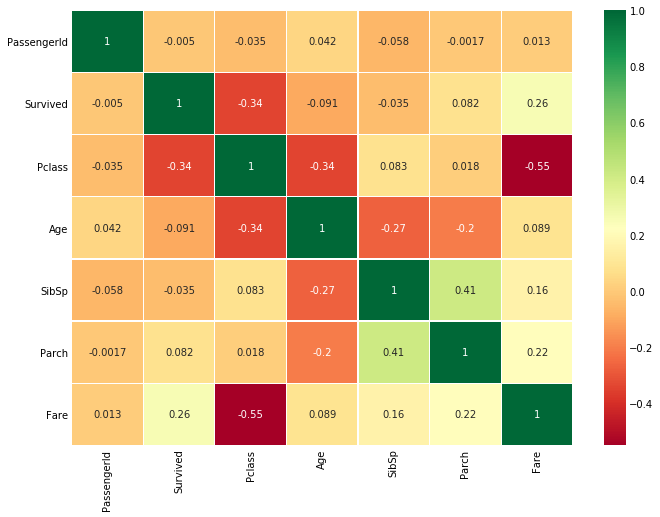

In [73]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

양의 상관관계: A가 증가하면 B가 증가할때에 해당. 값 1은 완전한 양의 상관 관계를 의미한다.

음의 상관관계: A가 증가하면 B가 감소할때에 해당. 값 -1은 완벽한 음의 상관 관계를 의미합니다.

- 특별히 엄청 높은 상관관계가 보이지 않음
- 그러니 모든 feature를 골고루 사용해 분석하면 될 듯 하다

### Part2: Feature Engineering and Data Cleaning

#### Age_band
- Age는 연속형 변수이므로, 머신러닝을 시키기엔 문제가 있음.
- 연속형 변수를 범주형 값으로 변경할 필요가 있음.
- 가장 나이많은 승객이 80세 이므로 0~80의 범위를 5살씩 구분 => 16개의 구간 생성

In [75]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


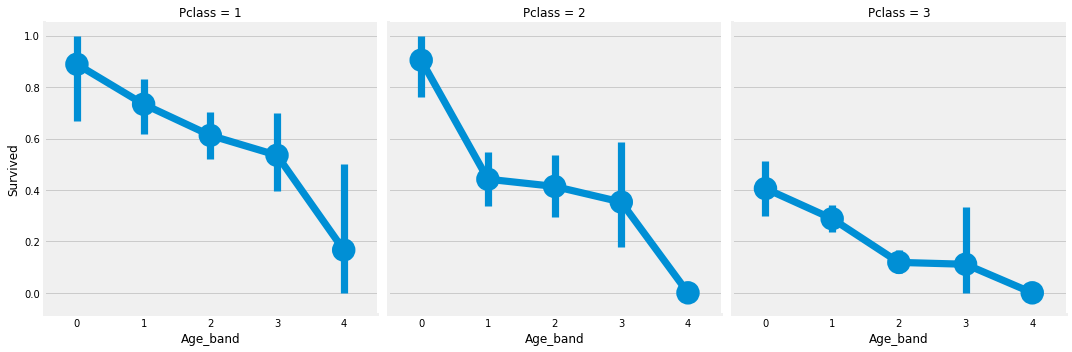

In [76]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

### Family_Size and Alone

- Family_Size와 Alone이라는 새로운 변수 생성

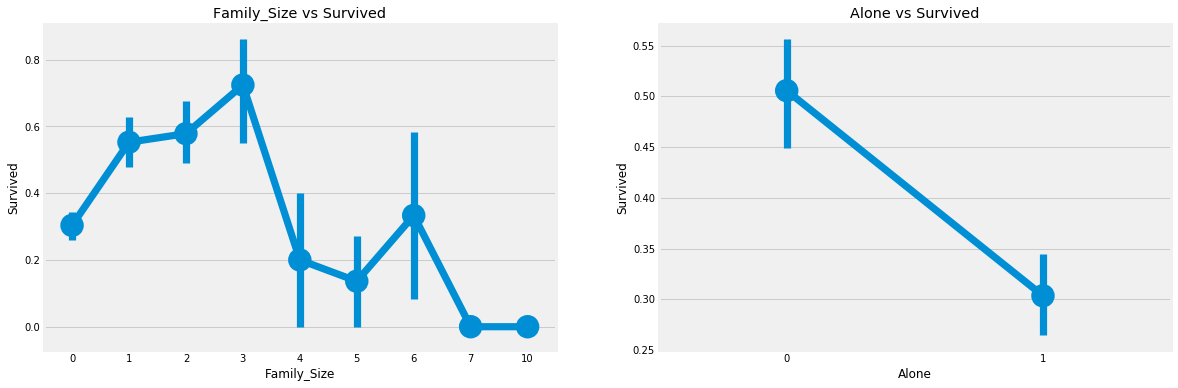

In [78]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

- Family_Size가 0이면 혼자(alone)란 의미
- Family_Size가 4이상일때 생존확률이 감소세를 보인다.

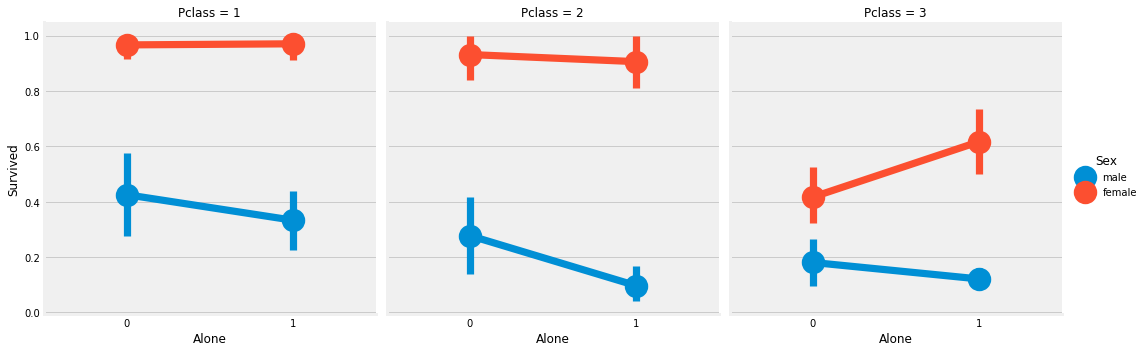

In [83]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

- 3class를 제외하고 혼자인 여성이 가족이 있는 여성보다  생존확률이 낮다.

#### Fare Range

pandas.qcut : 매개변수로 적은 bin의 수에 따라 구간을 나누는 함수

In [84]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- Fare가 증가할수록 생존 확률이 높음
- Age_Band처럼 값을 변경해야함

In [87]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

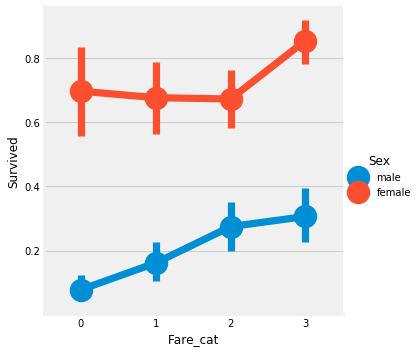

In [88]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

#### 문자열을 숫자로 변경

In [89]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

#### 불필요한 Column 삭제
- Name: 어떠한 범주값으로도 변환할 수 없으므로 이름 기능은 필요하지 않음.

- Age : Age_band를 활용하면 됨.

- Ticket: 분류할 수 없는 임의의 문자열 형태임

- Fare :  Fare_cat이 있어서 불필요함.

- Cabin : NaN 값이 많고 승객도 여러 개의 객실을 가지고 있어서 필요없음.

- Fare_Range : Fare_cat이 있어서 불필요함

- PassengerID -> 분류할 수 없음.

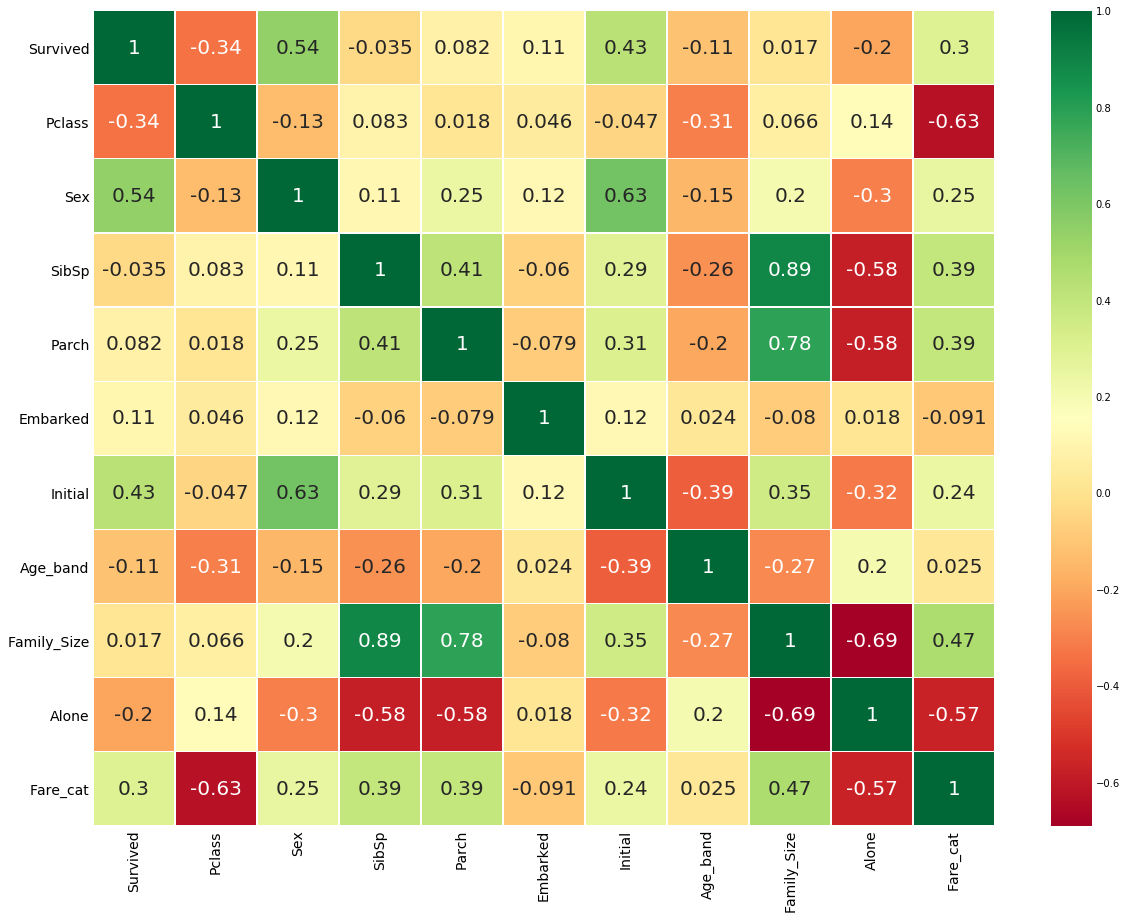

In [90]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Part3: Predictive Modeling

총 7종류의 모델 사용  

1) Logistic Regression

2) Support Vector Machines(Linear and radial)

3) Random Forest

4) K-Nearest Neighbours

5) Naive Bayes

6) Decision Tree

7) Logistic Regression

In [91]:
#logistic regression
from sklearn.linear_model import LogisticRegression 

 #support vector Machine
from sklearn import svm

 #Random Forest
from sklearn.ensemble import RandomForestClassifier

 #KNN
from sklearn.neighbors import KNeighborsClassifier

 #Naive bayes
from sklearn.naive_bayes import GaussianNB

 #Decision Tree
from sklearn.tree import DecisionTreeClassifier

 #training and testing data split
from sklearn.model_selection import train_test_split

 #accuracy measure
from sklearn import metrics

 #for confusion matrix
from sklearn.metrics import confusion_matrix

In [94]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

##### Radial Support Vector Machines(rbf-SVM)

In [97]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


##### Linear Support Vector Machine(linear-SVM)

In [98]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is  0.8171641791044776


##### Logistic Regression

In [99]:
model= LogisticRegression()
model.fit(train_X,train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for the Logistic Regression is ',metrics.accuracy_score(prediction3,test_Y))

Accuracy for the Logistic Regression is  0.8134328358208955


##### Decision Tree

In [100]:
model= DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for the Decision Tree is ',metrics.accuracy_score(prediction4,test_Y))

Accuracy for the Decision Tree is  0.8059701492537313


##### K-Nearest Neighbours(KNN

In [101]:
model= KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for the KNN is ',metrics.accuracy_score(prediction5,test_Y))

Accuracy for the KNN is  0.832089552238806


- KNN의 경우 인접 특성값의 개수에 따라 변경됨
- 기본값은 5, 값이 달라지면 어떻게 되는지 그래프로 확인

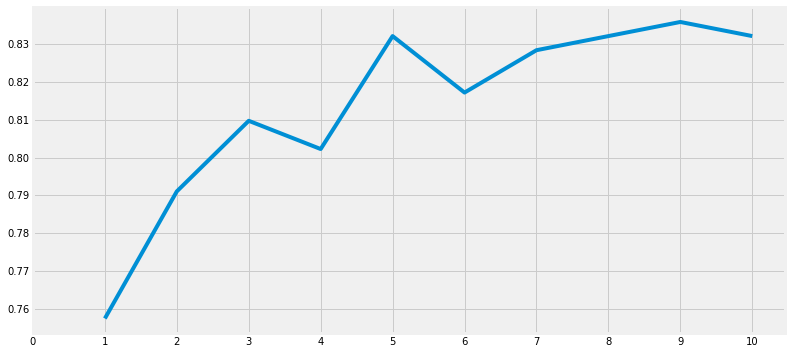

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [102]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

##### Gaussian Naive Bayes

In [103]:
model= GaussianNB()
model.fit(train_X,train_Y)
prediction6 = model.predict(test_X)
print('The accuracy for the NaiveBayes is ',metrics.accuracy_score(prediction6,test_Y))

The accuracy for the NaiveBayes is  0.8134328358208955


##### Random Forests

In [104]:
model= RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7 = model.predict(test_X)
print('The accuracy for the Random Forests is ',metrics.accuracy_score(prediction7,test_Y))

The accuracy for the Random Forests is  0.8208955223880597


- 모델이 정확성이 분류를 잘 한다는 의미가 아니다.
- 교육 및 테스트데이터가 변경되면 모델의 정확성도 변경되기 떄문.(model variance)
- 이를 극복하고 일반화된 모델을 얻기 위해 교차검증(Cross Validation)시용

#### 교차검증(Cross Validation)

- 머신러닝시에 들어가는 데이터가 불균형한 경우가 많다. 
EX) Pclass가 1 Class에 해당하는 값이 많고 2,3에 해당하는 값이 적을 경우  
  
- 따라서 데이터 세트의 각 인스턴스와 모든 인스턴스에서 알고리즘을 훈련하고 테스트해야 한다. 그런 다음 데이터 세트에 대해 기록된 모든 정확도의 평균을 구할 수 있다.

1) K-폴드 교차 검증은 먼저 데이터 세트를 k-subset으로 나누는 방식으로 동작한다.

2) 데이터 세트를 (k=5) 부분으로 나눈다고 가정합시다. 우리는 4개 부품에 대한 알고리즘을 테스트하고 훈련하기 위해 1개 파트를 예약한다.

3) 각 반복에서 테스트 파트를 변경하고 다른 파트에 대한 알고리즘을 교육하여 프로세스를 계속합니다. 그런 다음 알고리즘의 평균 정확도를 얻기 위해 정확도와 오류를 평균화한다.

이를 K-폴드 교차 검증이라고 합니다.

4) 알고리즘은 일부 훈련 데이터의 데이터 세트에 비해 적합하지 않을 수 있으며, 때로는 다른 훈련 데이터 세트에 대해서도 지나치게 적합할 수 있다. 따라서 교차 검증을 통해 일반화된 모델을 달성할 수 있다.

In [106]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#k=10으로 가정, 10개의 동일한 파트로 구분함.

kfold = KFold(n_splits=10, random_state=22)
xyz=[]
accuracy=[]
std=[]

#머신러닝 알고리즘 종류 나열
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.811473,0.027225
Naive Bayes,0.801386,0.028999
Random Forest,0.811486,0.032608


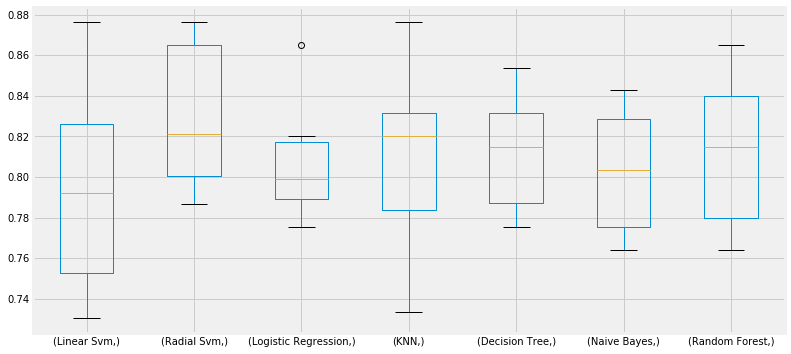

In [107]:
#Boxplot으로 확인
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

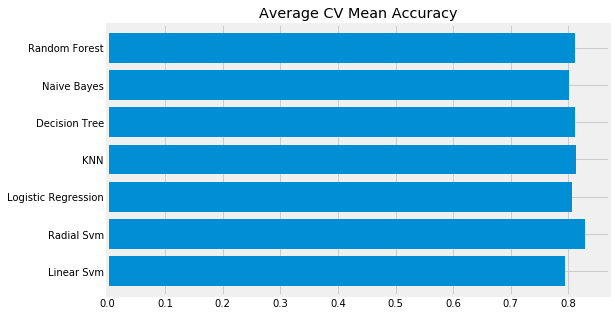

In [108]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

- 분류 정확도가 불균형으로 인해 오해의 소지가 있을 수 있다. 모형이 어디에서 잘못되었는지, 또는 모형이 어떤 클래스를 잘못 예측했는지를 보여주는 Confuse Matrix의 도움으로 요약된 결과를 얻을 수 있다.

#### Confusion Matrix

- Confusion Matrix는 Classifier에 의해 만들어진 정확하고 부정확한 분류의 수를 제공한다.

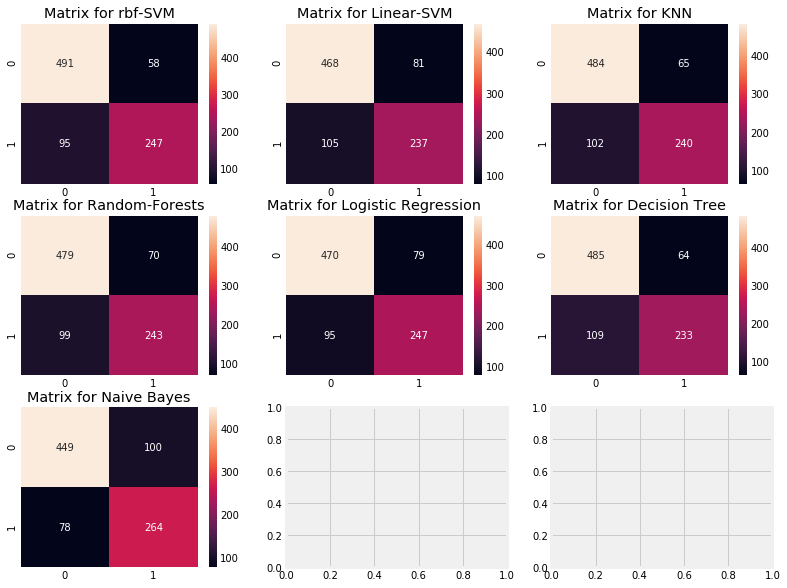

In [110]:
f,ax=plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

Confuse Matrix해석

- 왼쪽 대각선 : 각 클래스에 대해 올바른 예측 수
- 오른쪽 대각선 : 잘못된 예측 수를 나타냅니다.
    
EX) rbf-SVM에 대한 첫 번째 그림을 보면

1) 올바른 예측의 수는 491(죽은 경우) + 247(생존한 경우)이며 평균 CV 정확도는 (491+247)/891 = 82.8%입니다.

2) 오류--> 58명의 사망자를 생존자로 잘못 분류했고 95명은 사망자로 분류했다. 그래서 그것은 죽은 사람이 살아남았다고 예언함으로써 더 많은 실수를 저질렀다.

모든 행렬을 살펴봄으로써, 우리는 rbf-SVM이 죽은 승객을 올바르게 예측할 수 있는 더 높은 가능성을 가지고 있다고 말할 수 있지만, Naivity Bayes는 살아남은 승객을 올바르게 예측할 수 있는 더 높은 가능성을 가지고 있다.

### 하이퍼-파라미터 조정
- 학습모델의 매개변수를 조정해보기로 함. 
- SVM 모델의 C와 감마처럼, 그리고 다른 분류기에 대해 유사하게 다른 매개 변수를 초 매개 변수(hyper-parameter)라고 함.
- 이를 조정하여 알고리듬의 학습 속도를 변경하고 더 나은 모델을 얻을 수 있다. 이를 하이퍼 파라미터 튜닝이라고 함.
  
- SVM과 RandomForest와 같은 두 가지 가장 좋은 분류기에 대한 하이퍼 매개 변수를 조정할 것이다.

#### SVM 매개변수 조정( C, gamma)

In [113]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   14.5s finished


#### Random Forests

In [114]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   30.1s finished


0.819327098110602
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


Rbf-Svm에선 C=0.4, gamma=0.3 을 사용할 시  82.83% 확률로 가장 좋게 나왔고
RandomForest에선 n_estimators=300일 때 81.8% 확률로 가장 좋게 나왔다.

#### 앙상블(Ensembling)

- 앙상블은 모형의 정확도나 성능을 높이는 좋은 방법.
- 다양한 단순 모델의 조합으로 하나의 강력한 모델을 만드는 것
- 조립은 다음과 같은 방법으로 수행할 수 있습니다.

1) Voting Classifier

2) Bagging

3) Bagging


##### Voting Classifier
- 기계 학습 모델의 예측을 결합하는 가장 간단한 방법
- 모든 하위 모델의 예측에 기반한 평균 예측 결과를 제공

In [122]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),('RBF',svm.SVC(probability=True,kernel='rbf',C=0.4,gamma=0.3)),('RFor',RandomForestClassifier(n_estimators=300,random_state=0)),('LR',LogisticRegression(C=0.05)),('DT',DecisionTreeClassifier(random_state=0)),('NB',GaussianNB()),('svm',svm.SVC(kernel='linear',probability=True))],voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is: ',ensemble_lin_rbf.score(test_X,test_Y))
cross = cross_val_score(ensemble_lin_rbf,X,Y,cv=10,scoring='accuracy')
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is:  0.8208955223880597
The cross validated score is 0.8260424469413234


##### Bagging

- 데이터 세트의 작은 파티션에 유사한 분류기를 적용한 다음 모든 예측의 평균을 취함으로써 작동
- 평균화로 인해 분산이 감소됨.
- Voting Classifier와 달리 Bagging은 유사한 분류기를 사용함

###### Bagging KNN
- 배깅은 분산이 높은 모형에서 잘 작동함
- DecisionTree, RandomForest이 대표적 예시

In [124]:
#KNN Bagging

from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)

model.fit(train_X,train_Y)
prediction=model.predict(test_X)

print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))

result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


###### Bagged DecisionTree

In [126]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)

model.fit(train_X,train_Y)
prediction=model.predict(test_X)

print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))

result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged KNN is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8227590511860174


##### Boosting

- Classifier에 순차학습을 사용하는 앙상블기법
- 약한 모델의 단계적 향상 방법이다.
- 먼저 데이터 세트를 교육한 뒤, 결과를 보고, 잘못 예측된 인스턴스에 초점을 맞추거나 더 가중치를 부여해 이 잘못된 인스턴스를 올바르게 예측할때 까지 반복 예측 하는것

##### AdaBoost(Adaptive Boosting)
- 이 경우 약한 학습자 또는 추정자는 Decision Tree.
- dafault base_estimator를 원하는 알고리즘으로 변경할 수 있다.

In [127]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


##### Stochastic Gradient Boosting

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8249188514357055


##### XGBoost

In [131]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8249188514357055


- AdaBoost,Gradient Boost 에서 높은 값이 나왔다.

##### Hyper-Parameter Tuning for AdaBoost

In [ ]:
n_estimators = list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

- AdaBoost에서 얻을 수 있는 최대 정확도는 n_estimators = ,learning_rate= 일 때, % 이다

##### Confusion Matrix for the Best Model

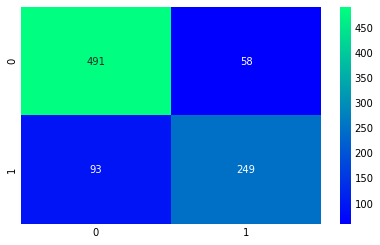

In [134]:
ada = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### Feature Importance

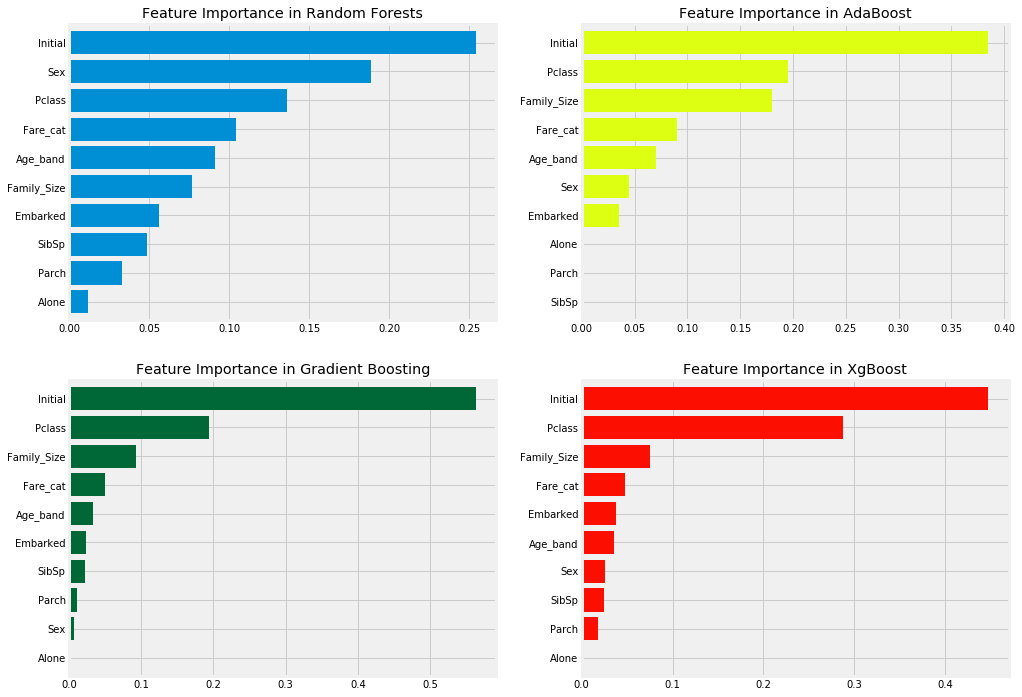

In [135]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

[분석 결과]

1) 일반적으로 중요한 feature으로는 Initial, Fare_cat, Pclass, Family_Size 가 있다.

2) Sex는 별로 중요하지 않은 것 같은데, 우리가 아까 본 것처럼 Sex와 Pclass가 매우 좋은 차별화 요소를 주고 있다는 것은 충격적이다. Sex은 Random Forest에서만 중요하게 보인다.

그러나 많은 분류기에서 맨 위에 있는 초기 기능을 볼 수 있다. 우리는 이미 Sex와 Initial 사이의 긍정적인 상관관계를 보았기 때문에 학습모델에선 은 둘 다 성별을 언급하고 있는 상황이다..

3) 이와 유사하게 P 클래스와 Fare_cat은 승객의 상태와 Alone, Parch 및 SibSp를 포함한 Family_Size를 나타낸다.